# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from __future__ import print_function

df = pd.read_csv('data/human_body_temperature.csv')
temperature_data = df['temperature']
poulation_mean = 98.6
male_body_temp = df[df.gender=='M']['temperature']
female_body_temp = df[df.gender=='F']['temperature']

In [8]:
print(df.info())
print('-'*50)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
--------------------------------------------------
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


#### 1. Is the distribution of body temperatures normal?
 1. Graphically Test: Based on the distribution below the distribution appears to be roughly normal.

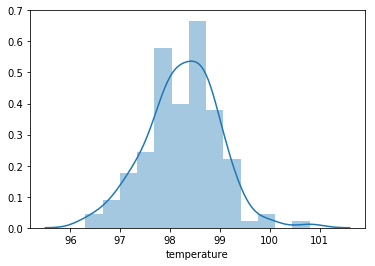

In [29]:
sns.distplot(df['temperature'])
plt.show()

2. The following function test the null hypothesis that a sample comes from a normal distribution. It resturns chi-sqaured value with associated p-value. Assuming a aplha or significance level of 0.05 (5%). So if the if the function returns a p value below this which means the null hypothesis is not true making the distribution not normal.

But since the p-value is (0.259 or 25.9%) way above the significance value of 0.05, we can say the distribution is normal.

In [28]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

#### 2. Is the sample size large? Are the observations independent?

According to Central Limit Theorem if the sample size is large enough (generally n>=30) the distribution is normal. Since the distribution is normal the sample size of 130 is large enough for consideration.

#### 3. Is the true population mean really 98.6 degrees F?

Bootstrap hypothesis test<br>
Null hypothesis: The mean is 98.6<br>
Alternative hypothesis: The mean is not 98.6<br>
Setting signifiance value of 0.05 (5%)<br>

So the test statistic is the mean of the dataset.
The bootstrap hypothesis testing shows that it is less likely that the true mean of Human Body temp is atleast 98.6F extreme.

In [14]:
#generate bootstraped replicate of premutated set.
def boostrap_replicates(data, func, number_samples, sample_size):
    
    sample = np.empty(number_samples, dtype=list)
    bs_replicates = np.empty(number_samples)
    
    for i in range(number_samples):
        sample[i] = np.random.choice(data, size=sample_size)
        bs_replicates[i] = func(sample[i])
    return bs_replicates

bs_mean_temp = boostrap_replicates(temperature_data, np.mean, number_samples=100000, sample_size=len(temperature_data))
print('The true mean of Human body temperature is not 98.6F:', (np.sum(bs_mean_temp>=poulation_mean)/len(bs_mean_temp))<0.05)

The true mean of Human body temperature is not 98.6F: True


#### Would you use a one-sample or two-sample test? Why?
Since the temperature data right is a single dataset (when not differetiating between male and female) and comparing the results with a single value, this is a one sample test.

#### In this situation, is it appropriate to use the  t  or  z  statistic?
Since the population parameter of mean body temperature (98.6F) is available and the sample size is greater than 30, we can use z statistics. If population parameter was not given that it becomes different to get accurate sample parameter which is dependent on population parameter.

#### Now try using the other test. How is the result be different? Why?
The formula for t statistics would be

t=(m−μ)/(s/√n)<br>

Where <br>
μ: Population mean, in this case 98.6<br>
m: sample mean, in this case mean of temperature_data.<br>
s: standard deviation of sample, in this case standard deivation of temperature_data.<br>

Given the calculated t above, we can get critical t value for degree of freedom of 129 (n-1) and a significance value of 0.05. We get a t critical value of 1.962. So if the absolute calculated value of t is greater critical value of t, then the different is sigficant between True Mean and population mean of (98.6). 


In [18]:
# The below function from scipy package calcualates the null hypothesis of sample mean from the given data set / array 
# being equal to provided population mean.
# As seen from the results below the p value is very small and the abs t value is larger then critical t value, 
# so we should reject the null hypothesis. 
# Meaning the true mean of the sample data set may not be equal to 98.6F.

stats.ttest_1samp(temperature_data, popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
We know from central limit theorom that a sample size of less 30 doesn't really gaurentee a normal distribution. And thus z statistics is less accurate in this case, but t statistics can be used.
As can be seen from the p values of the z and t statistics, there is different of 0.034.

In [22]:
# One sample test with sample size of 10.
small_sample = np.random.choice(temperature_data, size=10)

# Z statistics
print('The true mean of Human body temperature is not 98.6F:', (np.sum(small_sample>=poulation_mean)/len(small_sample))<0.05)
print('The p value in this case of s-statistics is {p}'.format(p=np.sum(small_sample>=poulation_mean)/len(small_sample)))

# t statistics
t, p = ttest_1samp(small_sample, popmean=98.6)
print('Using t statistics the calculated t is {t} and p value is {p}'.format(t=t, p=p))

The true mean of Human body temperature is not 98.6F: True
The p value in this case of s-statistics is 0
Using t statistics the calculated t is -0.805325551546 and p value is 0.441387959981


#### 5. At what temperature should we consider someone's temperature to be "abnormal"?
For a one draw sample we assume the standard deviation (std) of the sample is the best estimate we have for the population std. And this will be our margin of error.<br>
While the confidence interval is the interval around the sample mean where we are reasonably confident that the population mean (true mean) will be included.<br>

So, the formula for z confidence interval is<br>
x ± z(σ/√n)<br>
Where,<br>
x is the sample mean.<br>
z is crtical value of z.<br>
σ is population mean.<br>
n is the size of the sample, 130 in this case.<br>

While t confidence interval is<br>
x ± t(σ/√n)<br>
Where,<br>
x is the sample mean.<br>
t is crtical value of z.<br>
s standard error.<br>
n is the size of the sample, 130 in this case.

In [35]:
std = np.std(temperature_data)
mean = np.mean(temperature_data)
n = len(temperature_data)
print('margin of error is ',std)

#for z statistics the interval is
print('Confidence interval with z statistics is ',stats.norm.interval(0.95,loc=mean,scale=std/np.sqrt(n)))

# t statistics the interval is 
print('Confidence interval with t statistics is ',stats.t.interval(0.95,n-1,loc=mean,scale=std/np.sqrt(n)))

margin of error is  0.730357778905
Confidence interval with z statistics is  (98.123682111456645, 98.37477942700491)
Confidence interval with t statistics is  (98.12249318821641, 98.375968350245145)


#### 6. Is there a significant difference between males and females in normal temperature?
Since we are interested in difference between males and feamales normal body temperature, lets take a mean difference between them.

In [12]:
diff_mean = np.mean(female_body_temp)-np.mean(male_body_temp)
print('The difference between mean female and male normal body temperature is ', diff_mean)

The difference between mean female and male normal body temperature is  0.289230769231


Looks like there is a difference between the means of both male and female normal body temperature in this data set. But is there really a difference between them or just the variation in this dataset. <br>
To test if there is really a difference between thier means, we do a hypothesis testing assuming there is no difference.<br>
Hence,<br>
<b>Null Hypothesis</b>: There is no difference between female and male normal body temperature.<br>
<b>Alternative Hypothesis</b>: There is a difference between them.<br>
<b>significance value</b>: 0.05

In [25]:
#To build a set with same mean for both set we will make both the means same.
shifted_female_temp = female_body_temp - np.mean(female_body_temp) + np.mean(temperature_data)
shifted_male_temp = male_body_temp - np.mean(male_body_temp) + np.mean(temperature_data)

#generate bootstrap replicates.
bs_replicate_female=boostrap_replicates(shifted_female_temp, np.mean, 10000, len(shifted_female_temp))
bs_replicate_male=boostrap_replicates(shifted_male_temp, np.mean, 10000, len(shifted_male_temp))

#replicate difference of the mean
bs_diff_mean = bs_replicate_female-bs_replicate_male

#Using z statistics, since we have large enough sample and the original distribution is normal.
p=sum(bs_diff_mean>=diff_mean)/len(bs_diff_mean)
print('Using z statistics, the p value for this hypothesis is ',p)

Using z statistics, the p value for this hypothesis is  0


The p value of zero indicates there is little to no possibility of having that extreme of a value while having same mean. Hence we reject the null hypothesis, that there is no difference between male and female normal body temperature.